In [1]:
import pandas as pd
from hdtree import HDTreeClassifier
from information_measure import EntropyMeasure
from split_rule import LessThanHalfOfSplit, SingleCategorySplit,FixedValueSplit, TwentyQuantileSplit, LogisticRegressionSingleSplit, AbstractQuantileSplit, TwentyQuantileRangeSplit, TwoQuantileRangeSplit, LogisticRegressionDoubleCategorySplit
from sklearn.model_selection import train_test_split

# Dataset 1

## Mean 

In [2]:
train_data = pd.read_csv('../../data/train1mean.csv')
test_data = pd.read_csv('../../data/test1mean.csv')

In [3]:
train_data.head()

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,0.384615,0.000000,0.409091,0.250,0.0,0.000000,0.000000,0.637437,0.073030,...,0.001669,0.003339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.153846,0.142857,0.227273,0.125,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.307692,0.000000,0.636364,0.125,0.0,0.000000,0.000000,1.000000,0.002667,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.230769,0.071429,0.227273,0.250,1.0,0.135135,0.033784,1.000000,0.200000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,0.435897,0.000000,0.500000,0.250,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
train_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0.384615,0.000000,0.409091,0.250,0.0,0.000000,0.000000,0.637437,0.073030,0.112436,...,0.001669,0.003339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.153846,0.142857,0.227273,0.125,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.307692,0.000000,0.636364,0.125,0.0,0.000000,0.000000,1.000000,0.002667,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.230769,0.071429,0.227273,0.250,1.0,0.135135,0.033784,1.000000,0.200000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.435897,0.000000,0.500000,0.250,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
col_names = [*train_data.columns[:]]

In [7]:
X_train, X_val, y_train, y_val = train_test_split(train_data.iloc[:,:-1], train_data.iloc[:,-1], test_size=0.1, random_state=42)
X_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]
X_train, y_train = train_data.iloc[:,:-1], train_data.iloc[:,-1]

In [8]:
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [9]:
X_train = pd.concat([X_train, y_train], axis=1)
X_val = pd.concat([X_val, y_val], axis=1)
X_test = pd.concat([X_test, y_test], axis=1)

In [10]:
treeData1Mean = HDTreeClassifier(
                    # allowed_splits=[TwoQuantileRangeSplit.build()], 
                    allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=10,
                    min_samples_at_leaf=1)

In [11]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape, X_val.shape, y_val.shape

((167, 28), (167,), (666, 28), (666,), (67, 28), (67,))

In [12]:
treeData1Mean.fit(X_train.values, y_train.values)
print(treeData1Mean.score(X_train.values, y_train.values))
print(treeData1Mean.score(X_val.values, y_val.values))
print(treeData1Mean.score(X_test.values, y_test.values))

0.96996996996997
0.9552238805970149
0.9520958083832335


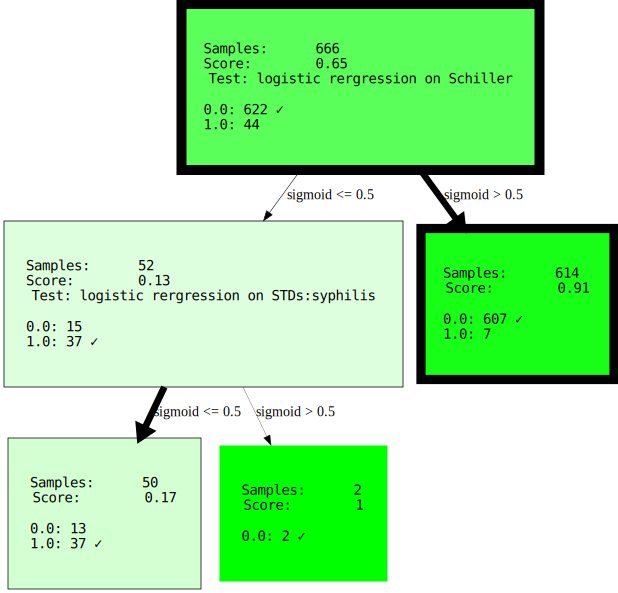

In [13]:
treeData1Mean.generate_dot_graph()

In [20]:
treeData1Mean = HDTreeClassifier(
                    allowed_splits=[LogisticRegressionDoubleCategorySplit.build()], 
                    # allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    # allowed_splits=[FixedValueSplit.build(), SingleCategorySplit.build(), TwentyQuantileRangeSplit.build(), TwentyQuantileSplit.build()],
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=5)

In [21]:
treeData1Mean.fit(X_train.values, y_train.values)
print(treeData1Mean.score(X_train.values, y_train.values))
print(treeData1Mean.score(X_val.values, y_val.values))
print(treeData1Mean.score(X_test.values, y_test.values))

0.9624624624624625
0.9552238805970149
0.9161676646706587


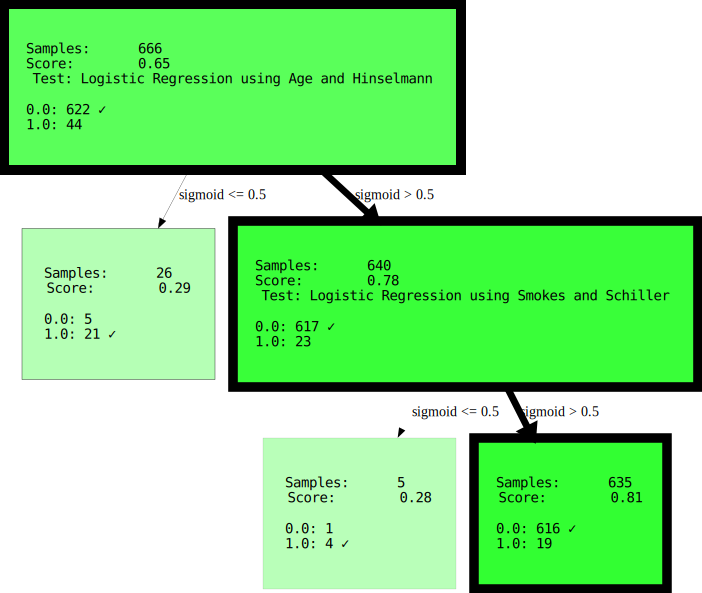

In [22]:
treeData1Mean.generate_dot_graph()

## Median

In [23]:
train_data = pd.read_csv('../../data/train1median.csv')
test_data = pd.read_csv('../../data/test1median.csv')

In [24]:
train_data.head()

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,0.384615,0.000000,0.409091,0.250,0.0,0.000000,0.000000,1.0,0.014000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.153846,0.142857,0.227273,0.125,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.307692,0.000000,0.636364,0.125,0.0,0.000000,0.000000,1.0,0.002667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.230769,0.071429,0.227273,0.250,1.0,0.135135,0.033784,1.0,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,0.435897,0.000000,0.500000,0.250,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [26]:
train_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0.384615,0.000000,0.409091,0.250,0.0,0.000000,0.000000,1.0,0.014000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.153846,0.142857,0.227273,0.125,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.307692,0.000000,0.636364,0.125,0.0,0.000000,0.000000,1.0,0.002667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.230769,0.071429,0.227273,0.250,1.0,0.135135,0.033784,1.0,0.200000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.435897,0.000000,0.500000,0.250,0.0,0.000000,0.000000,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
col_names = [*train_data.columns[:]]

In [28]:
X_train, X_val, y_train, y_val = train_test_split(train_data.iloc[:,:-1], train_data.iloc[:,-1], test_size=0.1, random_state=42)
X_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]
X_train, y_train = train_data.iloc[:,:-1], train_data.iloc[:,-1]

In [29]:
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [30]:
X_train = pd.concat([X_train, y_train], axis=1)
X_val = pd.concat([X_val, y_val], axis=1)
X_test = pd.concat([X_test, y_test], axis=1)

In [31]:
treeData1Mean = HDTreeClassifier(
                    # allowed_splits=[TwoQuantileRangeSplit.build()], 
                    allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=10,
                    min_samples_at_leaf=1)

In [32]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape, X_val.shape, y_val.shape

((167, 28), (167,), (666, 28), (666,), (67, 28), (67,))

In [33]:
treeData1Mean.fit(X_train.values, y_train.values)
print(treeData1Mean.score(X_train.values, y_train.values))
print(treeData1Mean.score(X_val.values, y_val.values))
print(treeData1Mean.score(X_test.values, y_test.values))

0.96996996996997
0.9552238805970149
0.9520958083832335


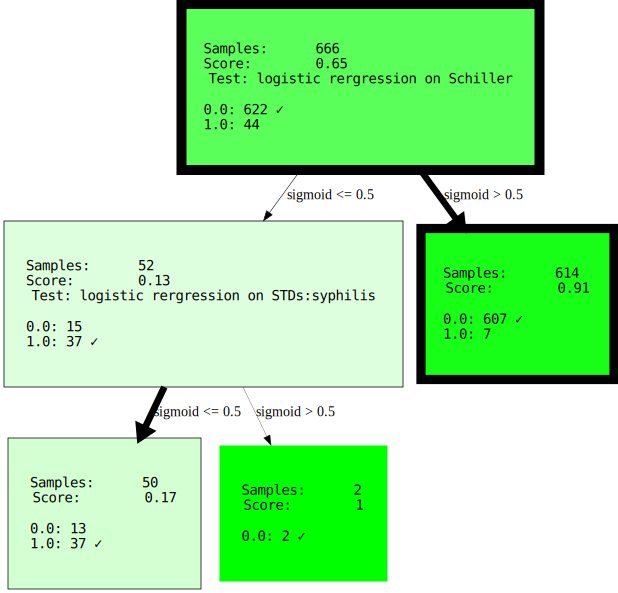

In [34]:
treeData1Mean.generate_dot_graph()

In [35]:
treeData1Mean = HDTreeClassifier(
                    allowed_splits=[LogisticRegressionDoubleCategorySplit.build()], 
                    # allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    # allowed_splits=[FixedValueSplit.build(), SingleCategorySplit.build(), TwentyQuantileRangeSplit.build(), TwentyQuantileSplit.build()],
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=1)

In [36]:
treeData1Mean.fit(X_train.values, y_train.values)
print(treeData1Mean.score(X_train.values, y_train.values))
print(treeData1Mean.score(X_val.values, y_val.values))
print(treeData1Mean.score(X_test.values, y_test.values))

0.9684684684684685
0.9552238805970149
0.9341317365269461


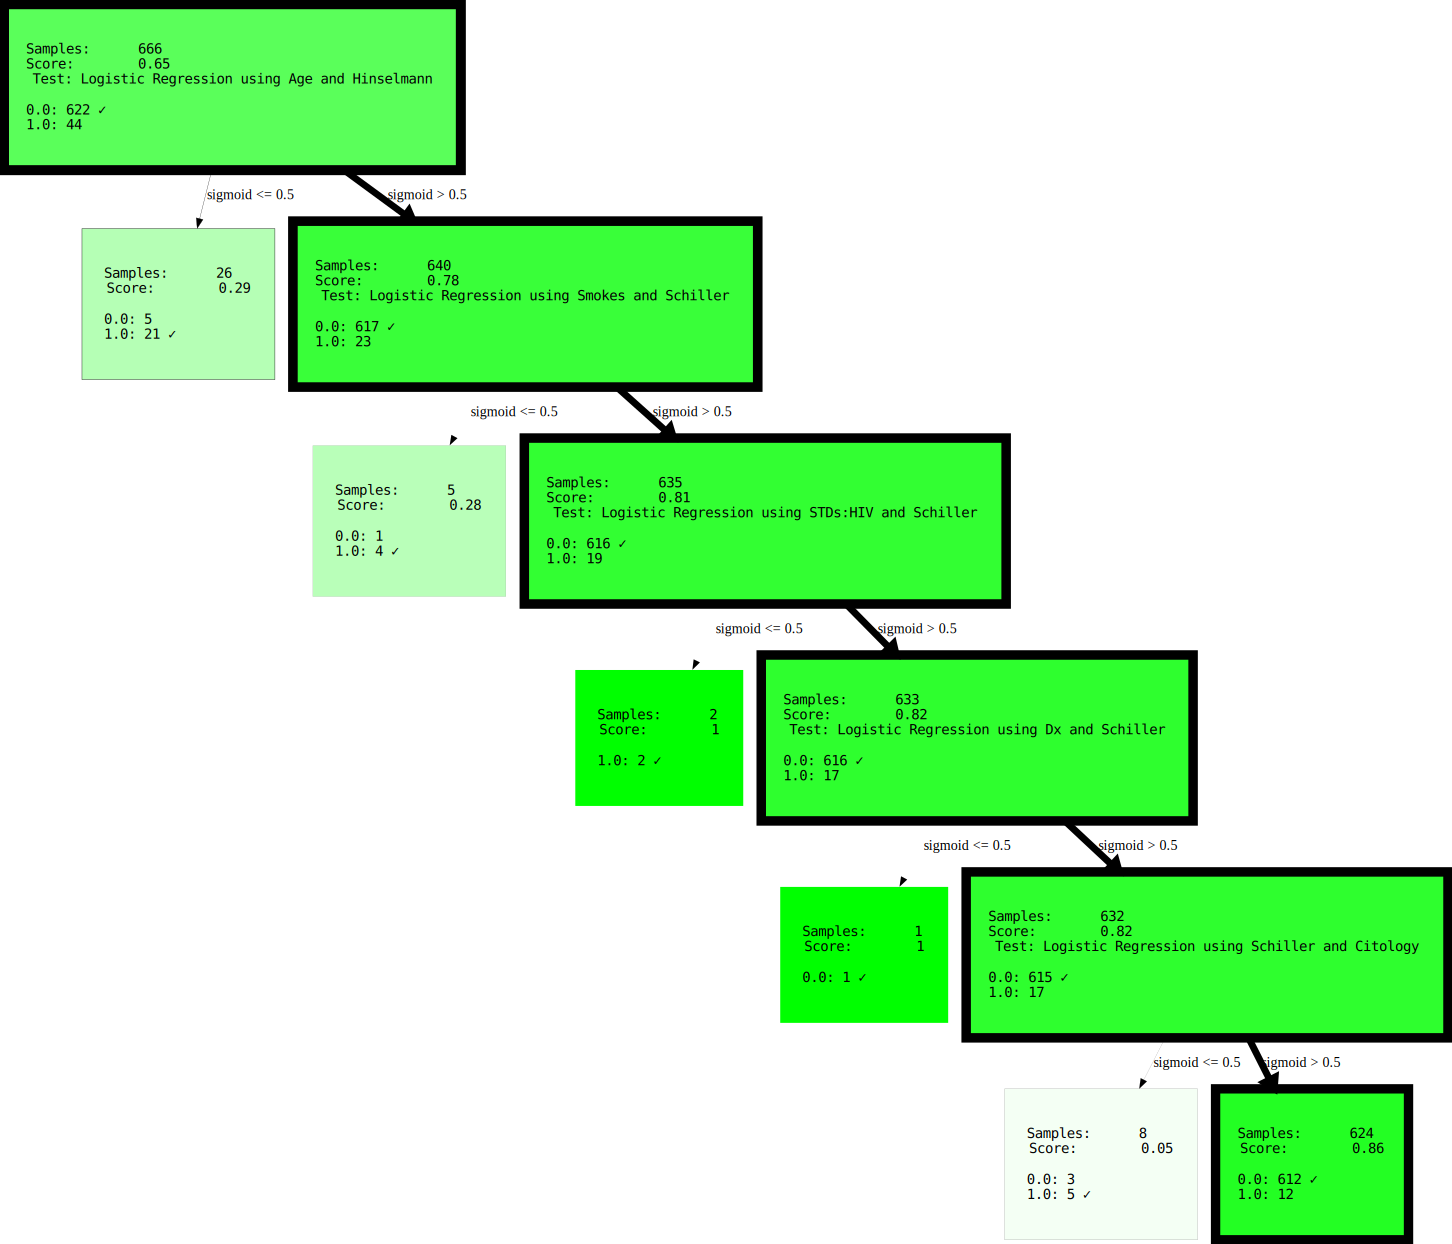

In [37]:
treeData1Mean.generate_dot_graph()